# SIT 720 Assignment 2
Bryon Baker

Student number: 85031775

# Install required libraries

In [1]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install yellowbrick
!pip3 install pyclustering

You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import warnings
import random
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

In [3]:
# Seed the random nunmber generator to ensure K-Means randomisation works properly.
random.seed()

print(f"Seeding random number generator. Random number is: {random.random()}")

Seeding random number generator. Random number is: 0.6962482117169664


In [4]:
# Uncomment this line for debugging dataframe contents.
#np.set_printoptions(threshold=np.inf)

# Part 1

## Load the SCADI Dataset

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://raw.githubusercontent.com/bryonbaker/datasets/main/SIT720/Ass2/SCADI.csv'
full_df = pd.read_csv(url)
print(f"{full_df.head()}\n")

   Gender  Age  d 5100-0  d 5100-1  d 5100-2  d 5100-3  d 5100-4  d 5100-8  \
0       0   18         0         0         0         0         1         0   
1       0   22         0         0         0         0         1         0   
2       0   18         0         0         0         1         0         0   
3       1   18         0         0         0         0         1         0   
4       0   19         0         0         0         0         1         0   

   d 5100-9  d 5101-0  ...  d 57022-8  d 57022-9  d 571-0  d 571-1  d 571-2  \
0         0         0  ...          0          0        0        0        0   
1         0         0  ...          0          0        0        0        0   
2         0         0  ...          0          0        0        0        0   
3         0         0  ...          0          0        0        0        1   
4         0         0  ...          0          0        0        0        1   

   d 571-3  d 571-4  d 571-8  d 571-9  Classes  
0      

In [6]:
# Display stats on the data frame
shape = full_df.shape
print(f"Initial shape before dropping columns: {shape}")
# Count the number of classes in the dataset before we drop the column. This is used in Question 3
num_classes_in_dataset = full_df['Classes'].nunique()
print(f"Number of unique classes in the original dataset is: {num_classes_in_dataset}")

Initial shape before dropping columns: (70, 206)
Number of unique classes in the original dataset is: 7


# Question 1
1. Determine the number of subgroups (clusters) from the dataset using attributes 3-255.
2. Is this the same as the number of classes presented by attribute 206 (Classes)? 
3. Explain and justify your findings.

In [7]:
# Drop attributes: 1, 2, and 205
df = full_df.drop(["Gender","Age","Classes"], axis=1)
shape = df.shape
print(f"New shape after dropping Gender, Age, and Classes: {shape}\n")
print(f"{df.head()}")

New shape after dropping Gender, Age, and Classes: (70, 203)

   d 5100-0  d 5100-1  d 5100-2  d 5100-3  d 5100-4  d 5100-8  d 5100-9  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         1         0         0   
2         0         0         0         1         0         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         1         0         0   

   d 5101-0  d 5101-1  d 5101-2  ...  d 57022-4  d 57022-8  d 57022-9  \
0         0         0         0  ...          0          0          0   
1         0         0         0  ...          0          0          0   
2         0         0         0  ...          0          0          0   
3         0         0         0  ...          0          0          0   
4         0         0         0  ...          0          0          0   

   d 571-0  d 571-1  d 571-2  d 571-3  d 571-4  

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
ref_xLine = [2,11]
ref_yLine = [625, 475]

min_k = 1
max_k = 12
for n in range(min_k,max_k):
    km = KMeans( n_clusters=n, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0 )
    y_km = km.fit(df)
    distortions.append(km.inertia_)

# Calculate the co-ordinates of the reference line that passes through the points at k=6 and k = 11
x1 = num_classes_in_dataset
x2 = max_k-1
y1 = distortions[num_classes_in_dataset-1]
y2 = distortions[max_k-2]
m =  (y2 - y1) / (x2 - x1)
c = y1 - (m * x1)
ref_y1 = (m * 2) + c    # Calc the left of the reference line
ref_yLine[0] = ref_y1


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


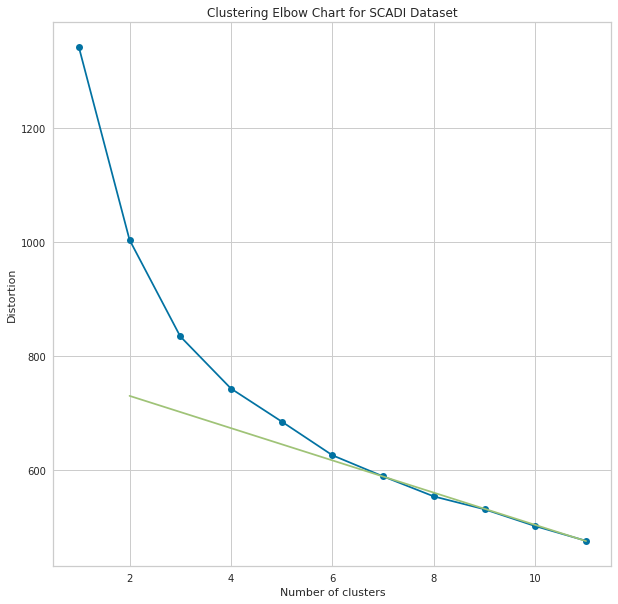

In [9]:
# Scale the plot so the reference line is more distinct form the reference line
fig = plt.figure()
fig.set_size_inches(10,10)

# plot the elbow chart and include a reference line based on the number of classes in the dataset.
plt.plot(range(min_k, max_k), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title(label="Clustering Elbow Chart for SCADI Dataset", loc="center")

# Plot the reference line to highlight where the elbow is located.
# The reference line is used to help discuss any differences between optimal clusters from the elbow versus what is in the dataset.
plt.plot(ref_xLine, ref_yLine, label = "line 1")

plt.show()

# Question 2
For the dataset, perform PCA. 
1. plot the captured variance with respect to increasing latent dimensionality.

   What is the minimum dimension that captures:
    - At least 89% variance
    - At least 99% variance

In [10]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Normalise all of the data to ensure they are of similar magnitude.
Xnorm = scale(df)

# Perform the Principal Component Analysis. The number of components is the number of coumns in the dataset.
# The number of components is the minimum of the number of data elements and festures 
n_components=min(df.shape[0], df.shape[1])
print("Number of comoponets: {}".format(n_components))
pca = PCA(n_components)
pca.fit(Xnorm)
print("PCA details => {}".format(pca))

print('='*50)
print("Explained Variance:")
# Calculate the amount of variance explained by each PC
var= pca.explained_variance_ratio_
print(var)

print('='*50)
print("Cumulative Explained Variance:")

#cum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
cum_var=np.cumsum(pca.explained_variance_ratio_*100)
print(cum_var)

dimensions = {}

# Find the minimum dimensions that capture 89% and 99% respectively
#num_dimensions = next(k for k, value in enumerate(cum_var) if value >= 89) 
#print("Minimum dimension for at least 89% variance is: ", num_dimensions)
#dimensions[89] = num_dimensions

#num_dimensions = next(k for k, value in enumerate(cum_var) if value >= 99) 
#print("Minimum dimension for at least 99% variance is: ", num_dimensions)
#dimensions[99] = num_dimensions

num_dimensions = 0
for value in cum_var:
    if value >= 89:
        dimensions[value]=num_dimensions
        break
    num_dimensions += 1

num_dimensions = 0
for value in cum_var:
    if value >= 99:
        dimensions[value]=num_dimensions
        break
    num_dimensions += 1

print('='*50)

# The "dictionary" tuple contains a map of >= 89%, variance and >=99%, variance. This is used in the next question.

Number of comoponets: 70
PCA details => PCA(n_components=70)
Explained Variance:
[1.88806809e-01 1.40294493e-01 9.28576978e-02 5.55026572e-02
 4.61869047e-02 4.34725875e-02 3.69877993e-02 3.13335959e-02
 2.84580857e-02 2.76366269e-02 2.54158872e-02 2.29197949e-02
 2.19763646e-02 1.99686493e-02 1.71542044e-02 1.68217640e-02
 1.49495489e-02 1.35025077e-02 1.30312569e-02 1.21237442e-02
 1.17685546e-02 9.66224236e-03 8.63248486e-03 7.84566734e-03
 7.59307576e-03 7.12095577e-03 6.55889086e-03 6.12964769e-03
 5.91117990e-03 5.17548744e-03 5.03651222e-03 4.65382307e-03
 4.39521523e-03 4.10905658e-03 3.56350637e-03 3.48557543e-03
 3.19702197e-03 2.97311722e-03 2.42793434e-03 2.24198157e-03
 2.01187470e-03 1.91211156e-03 1.86048071e-03 1.69712604e-03
 1.56776044e-03 1.23397690e-03 1.10068456e-03 9.44378334e-04
 9.25930483e-04 7.94493095e-04 6.85276056e-04 5.32382661e-04
 5.02833242e-04 4.16181322e-04 3.63010110e-04 3.39694589e-04
 2.48292321e-04 2.40044414e-04 1.69408256e-04 1.53845295e-04
 1.3

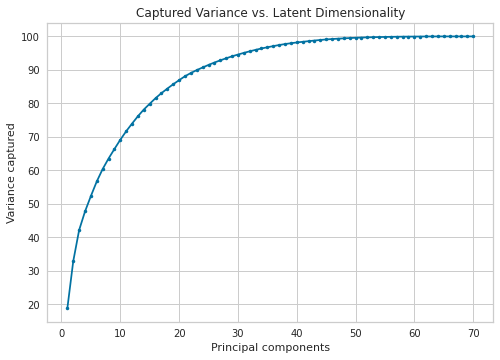

The minimum dimension that captures at least 89% variance is: 21
The minimum dimension that captures at least 99% variance is: 44


In [11]:
pca_num = a_list = list(range(1, n_components+1))
plt.plot(pca_num, cum_var, marker='.')
plt.xlabel("Principal components")
plt.ylabel("Variance captured")
plt.title(label="Captured Variance vs. Latent Dimensionality", loc="center")
plt.show()

for key,value in dimensions.items():
    print("The minimum dimension that captures at least {:.0f}% variance is: {}".format(key,value))

#print(f"Dimension that captures at least 89% variance os: {dimensions}")

# Question 3
Determine the purity of the clusters formed by the number of principal components that captured 89% and 99% variances respectively. Plot a line ghraph of the purity scores against the captured variances.

Discuss your findings.

### Helper functions
The following code segment defines some helper functions for calculating clulstering purity

In [12]:
# Takes a list that may contain duplicates and returns a list with unique ites.
def uniqueList(list1):
    # insert the list to the set
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    unique_list.sort()
    return unique_list

# Searches a Series and finds the item that appears with the greatest frequency and returns the count.
def findMaxLabel( data ):
    unique, counts = np.unique(data, return_counts=True)
    # print(np.asarray((unique, counts)).T)
    idx = np.argmax(counts, axis=0)
    # print(f"Index of max: {idx}")

    return unique[idx], counts[idx]

# Given a dataframe of columns "cluster" and "label", it calculates the cluster purity
def calculatePurity(data):
    print("INFO: Calculating clustering purity.")
    #print("INFO: Input data:\n{}".format(data))
          
    assert data.shape[1] > 0        # Check we won't have a divide by zero error later

    # Get a list of clusters that has no duplicates so we can use it as a key.
    clusterList = uniqueList(data['cluster'])
    # print(f"Cluster list: {clusterList}")

    # Go through each cluster one by one.
    runningSum = 0
    for c in clusterList:
        # print(f"INFO: Counting instances in cluster {c}")
        m1,m2 = findMaxLabel(data[data["cluster"] == c]["label"])
        print("INFO: Maximum frequency in cluster {} is label {}. It has a count of {}.".format(c,m1,m2))
        runningSum = runningSum + m2

    purity = runningSum / data.shape[0]

    return purity

### Calculate Purity

In [13]:
# Using the optimal number of clusters found in question 1, perform a K-Means clustering for the num_dimensions found in question 2 and calculate the purity score
# To measure pruity we need to count the majority label in a cluster and assign the cluster that label. However, the labels have been removed because we to not want the label to be part of the clustering.
# This method therefore will perform k-means on the non-PCA dataset and 

# Using the dictionary of cumulative variance and number of principal components created in the earlier question
# Calculate the purity score for each.

# Creaye a data frame for the final plot.
results_df = pd.DataFrame(columns=['purity_score', 'variance'])

for percentage in dimensions:
    print("\n"+"="*60)
    n = dimensions[percentage]
    print("INFO: Calculate the the purity score for {:.4f}% CV using {} dimensions:".format(percentage,n))
    
    # Perform the dimensionality reduction using the supplied number of components.
    pca = PCA(n_components=n)
    Zred = pca.fit_transform(Xnorm)
    print("INFO: Xnorm shape: {}".format(Xnorm.shape))
    print("INFO: Zred shape: {}".format(Zred.shape))
    
    # Perform the K-Means clustering. Given the anlysis in Q1 we will use the number of classes in the original dataset for this clustering activity.
    km = KMeans( n_clusters=num_classes_in_dataset, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0 )
    y_km = km.fit(Zred)
    
    # The K-Means clustering algorithm preserves the order of the input data in the resultant labels. Using the clusters defined during training, 
    # Create a nx2 table of the identified clusters and the class labels in the input dataset. Use this to calculate the cluster purity.
    d = pd.concat([pd.Series(y_km.labels_),pd.Series(full_df['Classes'].array)], axis=1)
    d.columns = ['cluster', 'label']
    # print("Allocation of labels to clusters is:\n{}".format(d))
    purity = calculatePurity(d)
    print(f"INFO: Purity score is: {purity}")
    results_df = results_df.append({'purity_score': purity, 'variance': percentage}, ignore_index=True)
    

# Print the summary results
print("\n"+"#"*60)
print("Purity scores by cumulative variance results:")
print(results_df)


print("#"*60+"\n")


INFO: Calculate the the purity score for 89.0832% CV using 21 dimensions:
INFO: Xnorm shape: (70, 203)
INFO: Zred shape: (70, 21)
INFO: Calculating clustering purity.
INFO: Maximum frequency in cluster 0 is label class7. It has a count of 5.
INFO: Maximum frequency in cluster 1 is label class6. It has a count of 1.
INFO: Maximum frequency in cluster 2 is label class6. It has a count of 27.
INFO: Maximum frequency in cluster 3 is label class2. It has a count of 5.
INFO: Maximum frequency in cluster 4 is label class7. It has a count of 6.
INFO: Maximum frequency in cluster 5 is label class4. It has a count of 10.
INFO: Maximum frequency in cluster 6 is label class7. It has a count of 5.
INFO: Purity score is: 0.8428571428571429

INFO: Calculate the the purity score for 99.0932% CV using 44 dimensions:
INFO: Xnorm shape: (70, 203)
INFO: Zred shape: (70, 44)
INFO: Calculating clustering purity.
INFO: Maximum frequency in cluster 0 is label class7. It has a count of 5.
INFO: Maximum freque

### Plot the Graphs
Plot a line graph of the purity scores against the 

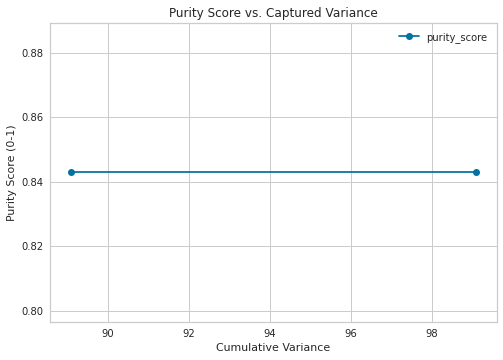

In [14]:
# gca stands for 'get current axis'
ax = plt.gca()

results_df.plot(kind='line',x='variance',y='purity_score',ax=ax, marker='o')
plt.xlabel("Cumulative Variance")
plt.ylabel("Purity Score (0-1)")
plt.title(label="Purity Score vs. Captured Variance", loc="center")

plt.show()

# QUESTION 4:
Let's assume you have two datasets, one is linear and the other is curved structural data.
1. Can we apply PCA on these datasets? Justify your answer

Refer to report for details.

# Part 2

In [15]:
# Because these are two distinct machine learning parts in the one notebook, reset all the variables to avoid interference.
%reset -f

In [16]:
import random
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

# Part 2: SCADI Dataset

## Question 5
* Download the attached heartdisease.csv file. 
* Read the file and separate the class and feature matrix.

In [17]:
# Takes a list that may contain duplicates and returns a list with unique ites.
def uniqueList(list1):
    # insert the list to the set
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    unique_list.sort()
    return unique_list

# Searches a Series and finds the item that appears with the greatest frequency and returns the count.
def findMaxLabel( data ):
    unique, counts = np.unique(data, return_counts=True)
    # print(np.asarray((unique, counts)).T)
    idx = np.argmax(counts, axis=0)
    # print(f"Index of max: {idx}")

    return unique[idx], counts[idx]

# Given a dataframe of columns "cluster" and "label", it calculates the cluster purity
def calculatePurity(data):
    print("INFO: Calculating clustering purity.")
    #print("INFO: Input data:\n{}".format(data))
          
    assert data.shape[1] > 0        # Check we won't have a divide by zero error later

    # Get a list of clusters that has no duplicates so we can use it as a key.
    clusterList = uniqueList(data['cluster'])
    # print(f"Cluster list: {clusterList}")

    # Go through each cluster one by one.
    runningSum = 0
    for c in clusterList:
        # print(f"INFO: Counting instances in cluster {c}")
        m1,m2 = findMaxLabel(data[data["cluster"] == c]["label"])
        print("INFO: Maximum frequency in cluster {} is label {}. It has a count of {}.".format(c,m1,m2))
        runningSum = runningSum + m2

    purity = runningSum / data.shape[0]

    return purity

In [18]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://raw.githubusercontent.com/bryonbaker/datasets/main/SIT720/Ass2/heartdisease.csv'
unpruned_df = pd.read_csv(url)

print("Shape of data upon read: {}".format(unpruned_df.shape))
# Drop the rows with missing values
unpruned_df = unpruned_df.apply (pd.to_numeric, errors='coerce')# Anything non-numeric is NaN
print(unpruned_df)
unpruned_df = unpruned_df.dropna()
full_df = unpruned_df.reset_index(drop=True)

# Display meta data about the dataframe.
print("Shape of data post row pruning: {}\n".format(full_df.shape))
print("Dataframe structure:\n{}".format(full_df.dtypes))

# Separate the features form the labels
X = full_df.drop(['num'], axis=1)
y = full_df['num']
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Display information about the contents to aid quality inspection.
print("\n"+"*"*75)
print("Dataframe Content Summary\n"+"*"*75)
print("\nFeatures:\n"+"="*10+"\n{}".format(X))
print("\nClasses:\n"+"="*10+"\n{}".format(y))

Shape of data upon read: (303, 14)
     Age  Sex  chest pain type  Trestbps  chol  fbs  restecg  thalach  exang  \
0     63    1                1       145   233    1        2      150      0   
1     67    1                4       160   286    0        2      108      1   
2     67    1                4       120   229    0        2      129      1   
3     37    1                3       130   250    0        0      187      0   
4     41    0                2       130   204    0        2      172      0   
..   ...  ...              ...       ...   ...  ...      ...      ...    ...   
298   45    1                1       110   264    0        0      132      0   
299   68    1                4       144   193    1        0      141      0   
300   57    1                4       130   131    0        0      115      1   
301   57    0                2       130   236    0        2      174      0   
302   38    1                3       138   175    0        0      173      0   

    

## Question 6
* Determine the number of clusters from the dataset. Is this the same as the actual number of classes in the dataset?

INFO: The breakdown of labels in the dataset are:
0    160
1     54
2     35
3     35
4     13
Name: num, dtype: int64


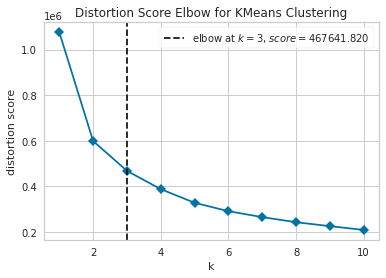

Cluster/Label relationship:
The number of unique labels in the dataset is: 5
Optimal number of clusters is: 3


In [19]:
# Scan through the labels and count the number of unique values.
num_labels = y.nunique()
print("INFO: The breakdown of labels in the dataset are:\n{}".format(y.value_counts()))

# Find the optimal number of clusters for the dataset
model = KMeans()
elbowChart = KElbowVisualizer(model, k=(1, 11), timings=False)

elbowChart.fit(X) # Fit the data to the visualiser
elbowChart.show() # Plot the graph and the elbow
plt.show()
optimalClusters = elbowChart.elbow_value_

print("Cluster/Label relationship:")
print(f"The number of unique labels in the dataset is: {num_labels}")
print(f"Optimal number of clusters is: {optimalClusters}")

# Question 7:

Perform K-Means clustering on the complete dataset and report the purity score.

In [20]:
# instatiate KMeans class and set the number of clusters to the optimal number returned form the elbow chart
model = KMeans(n_clusters=optimalClusters, random_state=10)

#X.reset_index(drop=True)
# call fit method with data 
km_result = model.fit(X)

# coordinates of cluster center
centroids = model.cluster_centers_ 

In [21]:
# The K-Means clustering algorithm preserves the order of the input data in the resultant labels. Using the clusters defined during training, 
# Create a nx2 table of the identified clusters and the class labels in the input dataset. Use this to calculate the cluster purity.
ls = pd.Series(y).astype(int)
ys = pd.Series(km_result.labels_).astype(int)
d = pd.concat([ys,ls], axis=1)
d.columns = ['cluster', 'label']

# print("Allocation of labels to clusters is:\n{}".format(d))
purity = calculatePurity(d)
print(f"\nNumber of clusters usefd for KMeans: {optimalClusters}")
print("Total number of data points in clusters is {}".format(y.shape[0]))
print("Purity of clustering is: {:.4f}%".format(purity))

INFO: Calculating clustering purity.
INFO: Maximum frequency in cluster 0 is label 0. It has a count of 67.
INFO: Maximum frequency in cluster 1 is label 0. It has a count of 65.
INFO: Maximum frequency in cluster 2 is label 0. It has a count of 28.

Number of clusters usefd for KMeans: 3
Total number of data points in clusters is 297
Purity of clustering is: 0.5387%


## Discussion:
The data set is very imbalanced, there are
* 164 elements with label 0
* 55 with label 1
* 36 with label 2
* 35 with label 3
* 13 with label 4

As a result, it is not surprising that label 0 is overshadowing the purity of the clustering

# Question 8. 
There are several distance metrics for K-Means such as euclidean, squared euclidian, Manhattan, Chebyshev, Minowski.
  * Your job is to compare the purity score of k-means clustering for different distance metrics
  * Select the best distance metric and explain why this distance metric is best for the given dataset.

In [22]:
# Reference: 
#    The following code snippet is based on the work of Arush Chillar, 2021
#    Blog url: https://www.kaggle.com/code/arushchillar/kmeans-clustering-using-different-distance-metrics/notebook

from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}

# PyClustering uses an array and not a dataframe so need to convert the type.
numpy_X = X.to_numpy()

print(f"\nINFO: Number of clusters used for KMeans: {optimalClusters}")
print("INFO: Total number of data points in clusters is {}".format(numpy_X.shape[0]))

results_df = pd.DataFrame(columns=['purity', 'metric'])

for measure, value in distance_measures.items():
    print("*"*50)
    print(f"INFO: Calculating purity for {measure} distance\n")
    
    initial_centers = random_center_initializer(numpy_X, optimalClusters, random_state=10).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(numpy_X, initial_centers=initial_centers, metric=distance_metric(value))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    # pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, numpy_X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    
    # calculatePurity requires a 2D list so combin the two lists/Series into a single 2D daraframe
    d = pd.concat([y,pd.Series(pyLabels)], axis=1)
    d.columns = ['cluster', 'label']
    purity = calculatePurity(d)
    results_df = results_df.append({'purity':purity,'metric':measure}, ignore_index = True)
    
    print("INFO: The purity score for {} distance is {:.4f}%".format(measure, purity))
    print("*"*50+"\n")


INFO: Number of clusters used for KMeans: 3
INFO: Total number of data points in clusters is 297
**************************************************
INFO: Calculating purity for euclidean distance

INFO: Calculating clustering purity.
INFO: Maximum frequency in cluster 0 is label 1. It has a count of 70.
INFO: Maximum frequency in cluster 1 is label 1. It has a count of 31.
INFO: Maximum frequency in cluster 2 is label 1. It has a count of 15.
INFO: Maximum frequency in cluster 3 is label 1. It has a count of 16.
INFO: Maximum frequency in cluster 4 is label 0. It has a count of 5.
INFO: The purity score for euclidean distance is 0.4613%
**************************************************

**************************************************
INFO: Calculating purity for squared euclidean distance

INFO: Calculating clustering purity.
INFO: Maximum frequency in cluster 0 is label 1. It has a count of 70.
INFO: Maximum frequency in cluster 1 is label 1. It has a count of 31.
INFO: Maximum f

In [23]:
print("*"*50)
print("SUMMARY")
print("*"*50)
print(results_df)

max_purity_df = results_df[results_df.purity == results_df['purity'].max()]
max_purity_df = max_purity_df.reset_index()  # make sure indexes pair with number of rows
for index, row in max_purity_df.iterrows():
    print("The best distance metric(s) is: {} with {:.4}% purity.".format(row['metric'], row['purity']))

**************************************************
SUMMARY
**************************************************
     purity             metric
0  0.461279          euclidean
1  0.461279  squared euclidean
2  0.451178          manhattan
3  0.427609          chebyshev
4  0.767677           canberra
5  0.626263         chi-square
The best distance metric(s) is: canberra with 0.7677% purity.


# QUESTION: 9
Use selection criteria (ANOVA, Chi-squared) to select the best three features and use them for K-Means clustering.
Based on the purity score, which features are you going to recommend and why?

In [24]:
# import the feature selection packages from sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif


In [25]:
def plotFeaturePerformance( fs ):
    # what are scores for the features
    #for i in range(len(fs.scores_)):
    #    print('Feature %d: %f' % (i, fs.scores_[i]))
        
    # plot the scores
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.show()

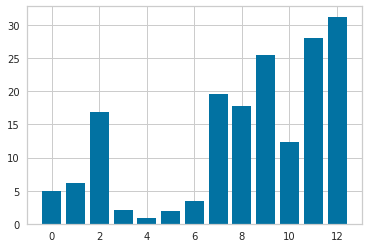

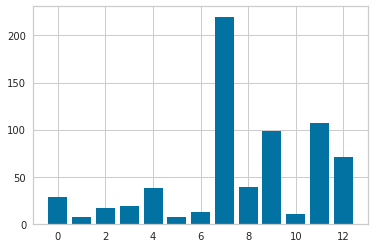

In [26]:
# Define the number of features Q9 has asked to find.
num_features = 3

def selectFeatures( X_train, y_pred, criteria ):
    fs = SelectKBest(criteria, k=num_features)
    fs.fit(X,y)
    new_x_train = fs.transform(X)
    # print(new_x_train)
    
    return new_x_train, fs

# Find the n best features using ANOVA.
new_x_train1, fs1 = selectFeatures( X, y, f_classif )
plotFeaturePerformance( fs1 )

# Find the n best features using Chi-squared.
new_x_train2, fs2 = selectFeatures( X, y, chi2 )
plotFeaturePerformance( fs2 )


In [27]:
print("CALCULATING PURITY WITH FEATURES USING ANOVA")
# instatiate KMeans class and set the number of clusters to the optimal number returned form the elbow chart
model = KMeans(n_clusters=optimalClusters, random_state=10)

# call fit method with data 
km_result = model.fit(new_x_train1)

# The K-Means clustering algorithm preserves the order of the input data in the resultant labels. Using the clusters defined during training, 
# Create a nx2 table of the identified clusters and the class labels in the input dataset. Use this to calculate the cluster purity.
ls = pd.Series(y).astype(int)
ys = pd.Series(km_result.labels_).astype(int)
d = pd.concat([ys,ls], axis=1)
d.columns = ['cluster', 'label']

# print("Allocation of labels to clusters is:\n{}".format(d))
purity = calculatePurity(d)
print(f"\nNumber of clusters usefd for KMeans: {optimalClusters}")
print("Total number of data points in clusters is {}".format(y.shape[0]))
print("Purity of clustering is: {:.4f}%".format(purity))

CALCULATING PURITY WITH FEATURES USING ANOVA
INFO: Calculating clustering purity.
INFO: Maximum frequency in cluster 0 is label 0. It has a count of 127.
INFO: Maximum frequency in cluster 1 is label 0. It has a count of 29.
INFO: Maximum frequency in cluster 2 is label 2. It has a count of 15.

Number of clusters usefd for KMeans: 3
Total number of data points in clusters is 297
Purity of clustering is: 0.5758%


In [28]:
print("CALCULATING PURITY WITH FEATURES USING CHI-SQUARED")
# instatiate KMeans class and set the number of clusters to the optimal number returned form the elbow chart
model = KMeans(n_clusters=optimalClusters, random_state=10)

# call fit method with data 
km_result = model.fit(new_x_train2)

# The K-Means clustering algorithm preserves the order of the input data in the resultant labels. Using the clusters defined during training, 
# Create a nx2 table of the identified clusters and the class labels in the input dataset. Use this to calculate the cluster purity.
ls = pd.Series(y).astype(int)
ys = pd.Series(km_result.labels_).astype(int)
d = pd.concat([ys,ls], axis=1)
d.columns = ['cluster', 'label']

# print("Allocation of labels to clusters is:\n{}".format(d))
purity = calculatePurity(d)
print(f"\nNumber of clusters usefd for KMeans: {optimalClusters}")
print("Total number of data points in clusters is {}".format(y.shape[0]))
print("Purity of clustering is: {:.4f}%".format(purity))

CALCULATING PURITY WITH FEATURES USING CHI-SQUARED
INFO: Calculating clustering purity.
INFO: Maximum frequency in cluster 0 is label 0. It has a count of 59.
INFO: Maximum frequency in cluster 1 is label 0. It has a count of 82.
INFO: Maximum frequency in cluster 2 is label 3. It has a count of 21.

Number of clusters usefd for KMeans: 3
Total number of data points in clusters is 297
Purity of clustering is: 0.5455%


# Question 10
Create a ML model for classifying subjects into two classes applying following constraints on above dataset. (6 marks)
* Use “num” as target variable and rest of them as predictor variables.
   * Report classification performance scores. Select scores that you think best for describing the model performance with appropriate justification.
   * Have you taken any step to check generalisability of the model? What is that and how it ensures generalisability.
   * Can you design and develop any other model for solving this problem? If so, then why have you used the reported one? Give your justification.

## References
Nested Cross Validation for Machine Learning. Brownlee (2020) Url: https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/

In [29]:
# Update the original pruned dataframe to make is a binary classifier. Use the following rules to remap num:
# num = 0 => num = 0
# num > 0 => num = 1
print(full_df.head())
print(full_df['num'].max())

   Age  Sex  chest pain type  Trestbps  chol  fbs  restecg  thalach  exang  \
0   63    1                1       145   233    1        2      150      0   
1   67    1                4       160   286    0        2      108      1   
2   67    1                4       120   229    0        2      129      1   
3   37    1                3       130   250    0        0      187      0   
4   41    0                2       130   204    0        2      172      0   

   oldpeak  slope   ca  thal  num  
0      2.3      3  0.0   6.0    0  
1      1.5      2  3.0   3.0    2  
2      2.6      2  2.0   7.0    1  
3      3.5      3  0.0   3.0    0  
4      1.4      1  0.0   3.0    0  
4


In [30]:
# Build a map for ever non-zero label that it maps to 1 - indicating that there is a diagnosis of CAD
# Do not hard code the range in case the dataset changes over time.
max_label = full_df['num'].max()
label_map = {0:0}    # How to map the values
for i in range(1,full_df['num'].max()+1):
    label_map[i] = 1
full_df['num'] = full_df['num'].map(label_map)# Remap the existing values. Anything >= 1 becomes 1
np.set_printoptions(threshold=np.inf)
print(full_df.head())

   Age  Sex  chest pain type  Trestbps  chol  fbs  restecg  thalach  exang  \
0   63    1                1       145   233    1        2      150      0   
1   67    1                4       160   286    0        2      108      1   
2   67    1                4       120   229    0        2      129      1   
3   37    1                3       130   250    0        0      187      0   
4   41    0                2       130   204    0        2      172      0   

   oldpeak  slope   ca  thal  num  
0      2.3      3  0.0   6.0    0  
1      1.5      2  3.0   3.0    1  
2      2.6      2  2.0   7.0    1  
3      3.5      3  0.0   3.0    0  
4      1.4      1  0.0   3.0    0  


In [31]:
# Set up the training/test data
X = full_df
X = X.drop('num', axis=1)
y = full_df['num']
print(X.shape)
print(y.shape)

(297, 13)
(297,)


In [32]:
# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Need to convert the dataframes to arrays so the KFold can work.
X = np.array(X)
y = np.array(y)

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    # define the model
    model = RandomForestClassifier(random_state=1)
    # define search space
    space = dict()
    space['n_estimators'] = [10, 100, 500]
    space['max_features'] = [2, 4, 6, 8, 10, 12, 13]
    # define search
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    
    # evaluate the model
    acc = accuracy_score(y_test, yhat)
    
    # store the result
    outer_results.append(acc)
    
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=0.900, est=0.835, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.867, est=0.820, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.800, est=0.854, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.733, est=0.861, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.833, est=0.828, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.800, est=0.828, cfg={'max_features': 2, 'n_estimators': 10}
>acc=0.867, est=0.816, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.793, est=0.825, cfg={'max_features': 2, 'n_estimators': 100}
>acc=0.966, est=0.802, cfg={'max_features': 6, 'n_estimators': 100}
>acc=0.828, est=0.814, cfg={'max_features': 4, 'n_estimators': 100}
Accuracy: 0.839 (0.061)


In [33]:
import warnings
# Some of the hyper parameter combinations are invalid. Supress the warnings.
warnings.filterwarnings('ignore')

In [34]:
from sklearn.linear_model import LogisticRegression

# Hyperparameter choice: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/#:~:text=Logistic%20regression%20does%20not%20really,with%20different%20solvers%20(solver).&text=Regularization%20(penalty)%20can%20sometimes%20be%20helpful.&text=Note%3A%20not%20all%20solvers%20support%20all%20regularization%20terms.
# Makes a case that there is little effective tuning opportunity with Logistic Regression

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    
    # define the model
    model = LogisticRegression(max_iter=10000)
    
    # define search space
    space = dict()
    space['penalty'] = ['none','l2']     # have left out none because of feedback form previous runs and the fact it generates a ton of incompatable param warnings
    space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
    space['C'] = [100, 10, 1.0, 0.1, 0.01]
    
    # define search
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
    
    # execute search
    result = search.fit(X_train, y_train)
    
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    
    # evaluate the model
    acc = accuracy_score(y_test, yhat)
    
    # store the result
    outer_results.append(acc)
    
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

warnings.filterwarnings('always')

>acc=0.933, est=0.824, cfg={'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
>acc=0.733, est=0.846, cfg={'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
>acc=0.800, est=0.854, cfg={'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
>acc=0.800, est=0.850, cfg={'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
>acc=0.867, est=0.846, cfg={'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
>acc=0.800, est=0.850, cfg={'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
>acc=0.867, est=0.820, cfg={'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
>acc=0.828, est=0.832, cfg={'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
>acc=0.966, est=0.839, cfg={'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
>acc=0.828, est=0.854, cfg={'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.842 (0.065)


In [35]:
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter choice: https://ken-hoffman.medium.com/decision-tree-hyperparameters-explained-49158ee1268e#:~:text=Decision%20Tree%20is%20a%20popular,helps%20to%20separate%20data%20further.

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    
    # define the model
    model = DecisionTreeClassifier()
    
    # define search space
    space = dict()
    space['max_depth'] = [None, 10, 20, 40, 80, 160]
    space['max_features'] = [2, 4, 6, 8, 10, 12, 13]
    
    # define search
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
    
    # execute search
    result = search.fit(X_train, y_train)
    
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    
    # evaluate the model
    acc = accuracy_score(y_test, yhat)
    
    # store the result
    outer_results.append(acc)
    
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=0.833, est=0.783, cfg={'max_depth': 160, 'max_features': 4}
>acc=0.833, est=0.779, cfg={'max_depth': 20, 'max_features': 8}
>acc=0.700, est=0.779, cfg={'max_depth': 80, 'max_features': 8}
>acc=0.733, est=0.816, cfg={'max_depth': None, 'max_features': 10}
>acc=0.700, est=0.764, cfg={'max_depth': 160, 'max_features': 10}
>acc=0.733, est=0.790, cfg={'max_depth': 160, 'max_features': 8}
>acc=0.700, est=0.764, cfg={'max_depth': 10, 'max_features': 10}
>acc=0.690, est=0.772, cfg={'max_depth': 40, 'max_features': 8}
>acc=0.621, est=0.783, cfg={'max_depth': 80, 'max_features': 6}
>acc=0.655, est=0.772, cfg={'max_depth': 20, 'max_features': 4}
Accuracy: 0.720 (0.065)


In [36]:
#Hyperparameter Selection
# Logistic Regression: Penalty: l2, Solver liblinear
# Random Forrest: Max features 2, n_estimators 500
# Decision Tree not considered in summary due to overall poor result.

### Helper Functions
The following functions are used to generate model evaluation data.

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn# For the heatmap
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def display_stats(y_test, y_pred):
    # Model Accuracy: how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

    # Model Precision: what percentage of positive tuples are labeled as such?
    print("Precision:",metrics.precision_score(y_test, y_pred))

    # Model Recall: what percentage of positive tuples are labelled as such?
    print("Recall:",metrics.recall_score(y_test, y_pred))

    #Calculate F1 Score
    print("F1 Score:",metrics.f1_score(y_test, y_pred))

    #Calculate Mean Absolute Error
    print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

    # kappa
    print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

    # ROC AUC
    print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
    
def evaluate_model(model_name, model):
    print(f"INFO: Evaluating the model {model_name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test,y_pred)
    cr = classification_report(y_test,y_pred)
    print(cm)
    print(cr)
    # Display the model metrics using the helper function.
    display_stats(y_test, y_pred)

    types = ['CAD no','CAD yes']

    df_cm = pd.DataFrame(cm, index = types, columns = types)
    # Create a new figure (10x7) in size.
    plt.figure(figsize = (10,7))
    title = model_name + " Confusion Matrix"
    plt.axes().set_title(title)
    sn.heatmap(df_cm, cmap="Blues", annot=True, fmt='d')
    plt.show()

    # Generate a no skill prediction (majority class) for the ROC curve
    # This will create a line from the origin to (1,1)
    ns_probs = [0 for _ in range(len(y_test))]

    # Generate the ROC Curves
    print("INFO: Generate ROC curve for Model: ")
    clf_probs = reg_model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    clf_probs = clf_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    clf_auc = roc_auc_score(y_test, clf_probs)
    # summarize scores
    print('INFO: No Skill: ROC AUC=%.3f' % (ns_auc))
    print("INFO: {}: ROC AUC={:.3f}".format(model_name, clf_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    clf_fpr, clf_tpr, _ = roc_curve(y_test, clf_probs)
    # plot the roc curve for the model
    plt.figure(figsize = (10,7))
    title = model_name + " ROC Curve"
    plt.axes().set_title(title)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(clf_fpr, clf_tpr, marker='.', label='Classifier')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

    # Generate a Precision / Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, clf_probs)
    # plot the precision-recall curves
    f1 = f1_score(y_test, y_pred)
    au_curve = auc(recall, precision)
    # summarize scores
    print('INFO: Precision Recall Score summary: f1=%.3f auc=%.3f' % (f1, au_curve))

    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.figure(figsize = (10,7))
    title = model_name + " Precision/Recall Curve"
    plt.axes().set_title(title)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='Classifier')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

/opt/app-root/lib64/python3.8/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/app-root/lib64/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


### Train/Test Data for Model Evaluation
This code generates train.test data for the ROC/AUC graphs and general model evaluation

In [38]:
from sklearn.model_selection import train_test_split

# Plot some AUC and ROC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (207, 13)
X_test shape  is :  (90, 13)
y_train shape is :  (207,)
y_test shape is  :  (90,)


In [39]:
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, shuffle=True, random_state=1)
reg_model = LogisticRegression(max_iter=10000, penalty='l2', solver='liblinear')
forrest_model = RandomForestClassifier( random_state = 1, max_features=2, n_estimators = 1000)
reg_scores = cross_val_score( reg_model, X, y, scoring='accuracy', cv=cv, n_jobs=1)
forrest_scores = cross_val_score( forrest_model, X, y, scoring='accuracy', cv=cv, n_jobs=1)
print('Logistic Regression Accuracy: %.3f (%.3f)' % (mean(reg_scores), std(reg_scores)))
print('Random Forrest Accuracy: %.3f (%.3f)' % (mean(forrest_scores), std(forrest_scores)))

Logistic Regression Accuracy: 0.842 (0.068)
Random Forrest Accuracy: 0.836 (0.062)


### Evaluate Models using best hyper parameters form earlier experiments.
Run a full model evaluation

##################################################
Logistic Regression Evaluation
INFO: Evaluating the model Logistic Regression
[[41 10]
 [ 6 33]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.84        51
           1       0.77      0.85      0.80        39

    accuracy                           0.82        90
   macro avg       0.82      0.83      0.82        90
weighted avg       0.83      0.82      0.82        90

Accuracy: 0.8222222222222222
Precision: 0.7674418604651163
Recall: 0.8461538461538461
F1 Score: 0.8048780487804877
Mean Absolute Error: 0.17777777777777778
Cohens kappa: 0.6423248882265276
ROC AUC: 0.8250377073906486


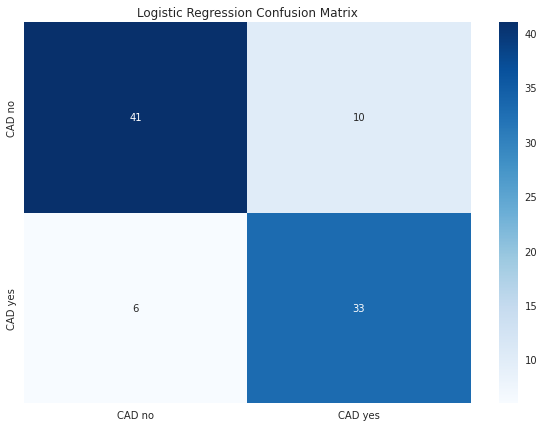

INFO: Generate ROC curve for Model: 
INFO: No Skill: ROC AUC=0.500
INFO: Logistic Regression: ROC AUC=0.888


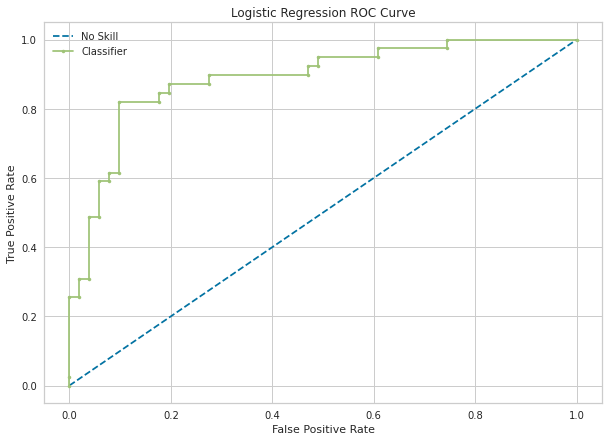

INFO: Precision Recall Score summary: f1=0.805 auc=0.863


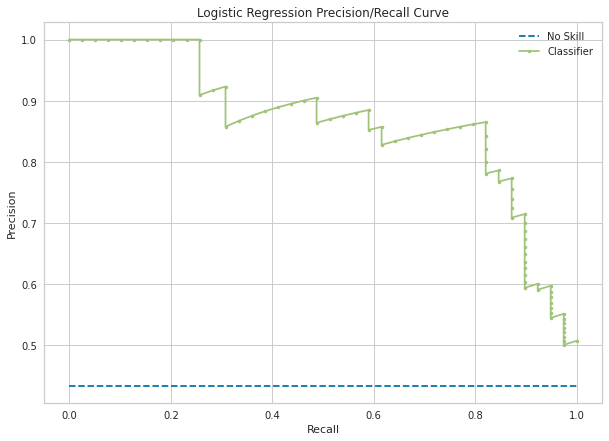

##################################################
Random Forrest Evaluation
INFO: Evaluating the model Random Forrest
[[44  7]
 [ 6 33]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        51
           1       0.82      0.85      0.84        39

    accuracy                           0.86        90
   macro avg       0.85      0.85      0.85        90
weighted avg       0.86      0.86      0.86        90

Accuracy: 0.8555555555555555
Precision: 0.825
Recall: 0.8461538461538461
F1 Score: 0.8354430379746836
Mean Absolute Error: 0.14444444444444443
Cohens kappa: 0.7067669172932332
ROC AUC: 0.854449472096531


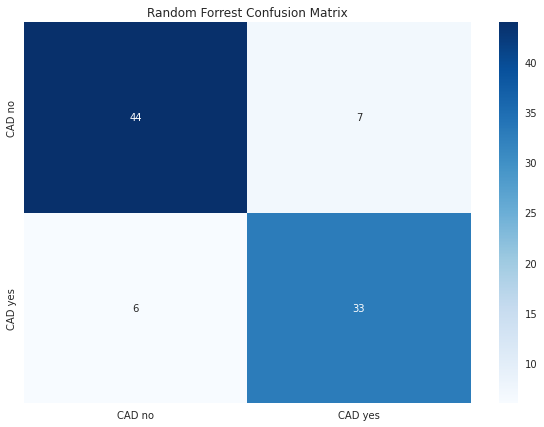

INFO: Generate ROC curve for Model: 
INFO: No Skill: ROC AUC=0.500
INFO: Random Forrest: ROC AUC=0.888


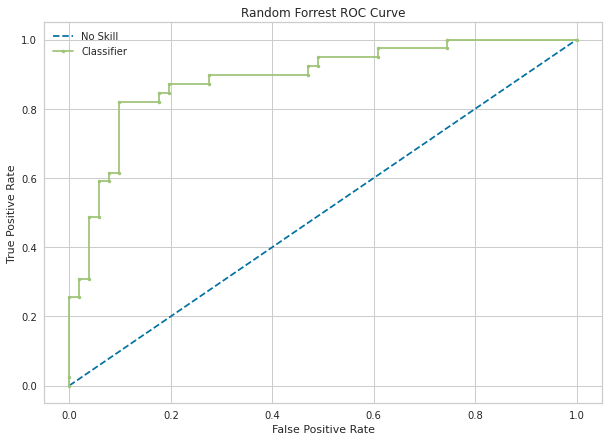

INFO: Precision Recall Score summary: f1=0.835 auc=0.863


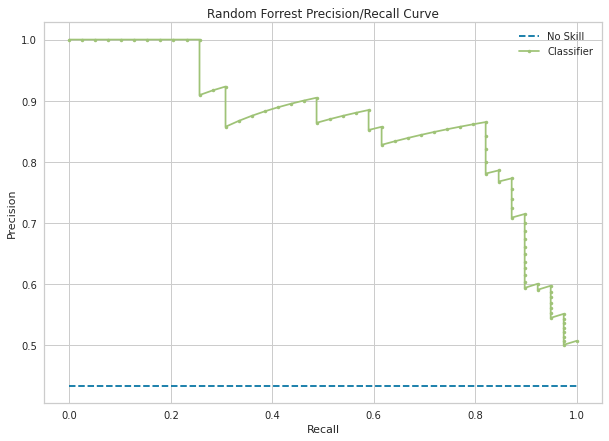

##################################################


In [40]:
print("#"*50)
print("Logistic Regression Evaluation")
reg_model = LogisticRegression(max_iter=10000, penalty='l2', solver='liblinear')
evaluate_model("Logistic Regression", reg_model)

print("#"*50)

print("Random Forrest Evaluation")
forrest_model = RandomForestClassifier( random_state = 1, max_features=2, n_estimators = 1000)
evaluate_model("Random Forrest", forrest_model)

print("#"*50)

# QUESTION 11
Suppose that a company has a number (>=500) of resorts around the globe. 10 marks
1. Identify a list of features (>=5) that can be used to describe these resorts.
2. Create a dataset (rows>=500) and explain all variables. You can generate data either synthetically or collecting from similar datasets. Submit your created dataset. In addition, please provide links in case you have collected the dataset.
3. Build a ML model that can help a customer to select appropriate set of resorts based on the season of travel. Present and describe the performance of your model. d. Why do we need a ML model for this problem?

In [41]:
url = 'https://raw.githubusercontent.com/bryonbaker/datasets/main/SIT720/Ass2/resorts.csv'
full_df = pd.read_csv(url)

print("Shape of data upon read: {}".format(full_df.shape))

print(full_df.head())

# Display meta data about the dataframe.
print("Shape of data post row pruning: {}\n".format(full_df.shape))
print("Dataframe structure:\n{}".format(full_df.dtypes))

Shape of data upon read: (513, 11)
   city  peak_season  snow_adventure  water_adventure  outdoor_adventure  \
0     1            3               1                0                  1   
1     1            3               1                0                  1   
2     1            3               1                0                  1   
3     1            3               1                0                  1   
4     1            3               1                0                  1   

   theme_parks  child_care  night_entertainment  cust_profile  booked_season  \
0            0           1                    1             3              3   
1            0           1                    1             3              1   
2            0           1                    1             3              3   
3            0           1                    1             1              1   
4            0           1                    1             1              1   

   resort  
0       1  
1  

In [42]:
# Separate the features form the labels
X = full_df.drop(['resort'], axis=1)
y = full_df['resort']
print(X)
print(y)

     city  peak_season  snow_adventure  water_adventure  outdoor_adventure  \
0       1            3               1                0                  1   
1       1            3               1                0                  1   
2       1            3               1                0                  1   
3       1            3               1                0                  1   
4       1            3               1                0                  1   
..    ...          ...             ...              ...                ...   
508     3            2               0                0                  1   
509     3            2               0                0                  1   
510     3            2               0                0                  1   
511     3            2               0                0                  1   
512     3            2               0                0                  1   

     theme_parks  child_care  night_entertainment  cust_profile

In [43]:
from sklearn.model_selection import train_test_split

# Plot some AUC and ROC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (359, 10)
X_test shape  is :  (154, 10)
y_train shape is :  (359,)
y_test shape is  :  (154,)


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

cv = KFold(n_splits=10, shuffle=True, random_state=1)
#dtree_model = DecisionTreeClassifier()
dtree_model = RandomForestClassifier(random_state=1)
dtree_scores = cross_val_score( dtree_model, X, y, scoring='accuracy', cv=cv, n_jobs=1)
print('Decision Tree Accuracy: %.3f (%.3f)' % (mean(dtree_scores), std(dtree_scores)))

Decision Tree Accuracy: 0.774 (0.029)


In [45]:
# Train gthe model
dtree_model.fit(X_train, y_train)

print("Testing model prediction works for known case.") 
row_num = 195
query_row = full_df.iloc[row_num]
expected_resort = query_row['resort']

query_df = X[0:0]
query_df.reset_index(drop=True)

data_to_append = {}
for i in range(len(query_df.columns)):
    data_to_append[query_df.columns[i]] = query_row[i]
query_df = query_df.append(data_to_append, ignore_index = True)

print(f"Input to query is:\n{query_df}")
print(f"The expected recommended resort is {expected_resort}")

Testing model prediction works for known case.
Input to query is:
   city  peak_season  snow_adventure  water_adventure  outdoor_adventure  \
0     2            1               0                1                  1   

   theme_parks  child_care  night_entertainment  cust_profile  booked_season  
0            1           0                    1             1              2  
The expected recommended resort is 11


In [46]:
# Validate the prediction works for a known case.
# Expect that the 
pred = dtree_model.predict(query_df)
if pred == expected_resort:
    print("MATCH TEST PASS:")
else:
    print("MATCH TEST FAIL")

MATCH TEST PASS:


In [47]:
# The next will use some self-assigned data and return a list of probabilities for a recommendation
# City = 3, Peak Season = 4, Outdoor adventure = True, Night Entertainment = False, Profile = Couple, Book in Summer
# 3, 4, 0, 0, 1, 0, 0, 1, 2, 1

resort_search = [3, 4, 0, 0, 1, 0, 0, 1, 2, 1]
query_df = X[0:0]
query_df.reset_index(drop=True)

data_to_append = {}
for i in range(len(query_df.columns)):
    data_to_append[query_df.columns[i]] = resort_search[i]
query_df = query_df.append(data_to_append, ignore_index = True)
print(query_df)


   city  peak_season  snow_adventure  water_adventure  outdoor_adventure  \
0     3            4               0                0                  1   

   theme_parks  child_care  night_entertainment  cust_profile  booked_season  
0            0           0                    1             2              1  


In [48]:
pred = dtree_model.predict(query_df)
print(f"The strongest recommendation is resort: {pred}")

pred_prb = dtree_model.predict_proba(query_df)
print(f"The ranked recommendations (ranging 0-1 with 1 being highest) are:\n{pred_prb}")

The strongest recommendation is resort: [23]
The ranked recommendations (ranging 0-1 with 1 being highest) are:
[[0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.04
  0.   0.   0.   0.   0.   0.   0.   0.   0.89 0.04 0.   0.   0.02]]
